<a href="https://colab.research.google.com/github/samis922/Electron-IoT/blob/main/Electron_IoT_sample_data_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload data files
#uploaded = files.upload()

import pandas as pd

# Load the data files
trend_data = pd.read_csv('/content/drive/MyDrive/IoT/trend0.csv')
cycle_data = pd.read_csv('/content/drive/MyDrive/IoT/pldcycn23.csv')


In [2]:
trend_data.head()

,ID,SMR,Calendar,Eng_Speed_Max,Eng_Speed_Ave,Blowby_Press_Max,LF_Exh_Temp_Max,LR_Exh_Temp_Max,RF_Exh_Temp_Max,RR_Exh_Temp_Max,...,TM_Oil_Temp_Max,Ambient_Temp_Max,Ambient_Temp_Ave,Ambient_Temp_Min,Atomos_Press_Ave,F_Brake_P_Max,R_Brake_P_Max,Travel_Speed_Max,ECO_ON,Machine_Serial
0,87093649,16857.2,2019-03-29 09:50:30,2251,1543,1442.846946,732,965,566,718,...,89,24,14,8,840,213.113082,212.093403,36.2,3901,9550
1,87093648,16837.2,2019-03-28 01:30:18,2249,1556,1417.354951,758,874,528,746,...,89,24,18,13,830,213.113082,212.093403,37.3,3065,9550
2,87093647,16817.2,2019-03-26 23:11:42,2332,1509,1316.406648,779,661,753,758,...,81,23,18,13,830,213.113082,212.093403,36.9,2486,9550
3,87093646,16797.2,2019-03-25 22:25:38,2240,1516,1373.508718,769,763,749,727,...,84,27,20,17,830,213.113082,212.093403,37.3,2810,9550
4,87093645,16777.2,2019-03-24 16:47:58,2248,1542,1388.803916,756,748,735,720,...,82,29,18,10,830,213.113082,212.093403,37.3,490,9550


**Data Overview**
Trend Data (trend0.csv):
The trend data contains various machine operation metrics over time. Here are the key columns:

ID: Unique identifier for each record.
SMR: Service Meter Reading, indicating the usage hours of the machine.
Calendar: Timestamp of the record.
Eng_Speed_Max / Eng_Speed_Ave: Maximum and average engine speed.
Blowby_Press_Max: Maximum blowby pressure.
LF_Exh_Temp_Max, LR_Exh_Temp_Max, RF_Exh_Temp_Max, RR_Exh_Temp_Max: Maximum exhaust temperatures for different parts.
TM_Oil_Temp_Max: Maximum transmission oil temperature.
Ambient_Temp_Max / Ambient_Temp_Ave / Ambient_Temp_Min: Maximum, average, and minimum ambient temperatures.
Atomos_Press_Ave: Average atmospheric pressure.
F_Brake_P_Max / R_Brake_P_Max: Maximum front and rear brake pressure.
Travel_Speed_Max: Maximum travel speed.
ECO_ON: Eco mode status.
Machine_Serial: Serial number of the machine.
Cycle Data (pldcycn23.csv):
The cycle data captures the operational cycles of the machine, including loading and transportation metrics. Key columns include:

ID: Unique identifier for each record.
Calendar: Timestamp of the record.
Payload: Weight of the material transported.
Empty_Drv_Time / Empty_Drv_Dist: Time and distance driven empty.
Empty_Stop_Time / Loading_Stop_Time / Loaded_Stop_Time: Stop times for various phases.
Loaded_Drv_Time / Loaded_Drv_Dist: Time and distance driven loaded.
Over_Load / Over_Speed: Indicators for overload and overspeed events.
Limit_Speed: Speed limit.
Truck_ID / Open_ID: Identifiers for the truck and operation.
Angle_Min / Angle_Ave / Angle_Max: Minimum, average, and maximum angles during operation.
Shift: Shift during which the operation took place.
Machine_Serial: Serial number of the machine.

In [3]:
cycle_data.head()

,ID,Calendar,Payload,Empty_Drv_Time,Empty_Drv_Dist,Empty_Stop_Time,Loading_Stop_Time,Loaded_Drv_Time,Loaded_Drv_Dist,Loaded_Stop_Time,Over_Load,Over_Speed,Limit_Speed,Truck_ID,Open_ID,Angle_Min,Angle_Ave,Angle_Max,Shift,Machine_Serial
0,1376999373,2019-03-29 23:19:42,90.5,7.2,3.5,0.4,2.4,11.8,3.6,0.1,0,0,37,32,124,-2.6,6.2,10.5,PM,9550
1,1376999374,2019-03-29 23:42:20,82.4,7.4,3.5,0.7,2.2,11.6,3.6,0.1,0,0,37,32,124,-3.6,6.2,10.4,PM,9550
2,1376999372,2019-03-29 22:57:14,85.8,10.6,4.2,9.0,2.8,12.6,3.8,0.1,0,0,37,32,122,-1.5,5.6,10.4,PM,9550
3,1376999371,2019-03-29 20:50:22,81.8,8.4,3.7,9.0,3.4,13.4,3.8,0.1,0,0,37,32,122,-5.2,6.0,11.0,PM,9550
4,1376999369,2019-03-29 19:46:22,79.1,8.7,3.7,1.1,2.8,11.7,3.7,0.0,0,0,37,32,122,-4.1,6.0,10.7,PM,9550


In [4]:
# Convert 'Calendar' columns to datetime format
trend_data['Calendar'] = pd.to_datetime(trend_data['Calendar'])
cycle_data['Calendar'] = pd.to_datetime(cycle_data['Calendar'])

# Handle missing values by filling with median (for simplicity)
trend_data_filled = trend_data.fillna(trend_data.median(numeric_only=True))
cycle_data_filled = cycle_data.fillna(cycle_data.median(numeric_only=True))


In [5]:
# Handle missing values by filling with median (for simplicity)
trend_data_filled = trend_data.fillna(trend_data.median(numeric_only=True))
cycle_data_filled = cycle_data.fillna(cycle_data.median(numeric_only=True))


In [6]:
from sklearn.preprocessing import StandardScaler

# Select columns to normalize (excluding non-numeric columns)
numeric_cols_trend = trend_data_filled.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_cycle = cycle_data_filled.select_dtypes(include=['float64', 'int64']).columns

scaler_trend = StandardScaler()
scaler_cycle = StandardScaler()

trend_data_filled[numeric_cols_trend] = scaler_trend.fit_transform(trend_data_filled[numeric_cols_trend])
cycle_data_filled[numeric_cols_cycle] = scaler_cycle.fit_transform(cycle_data_filled[numeric_cols_cycle])


In [7]:
# Calculate basic statistics for trend data
trend_data_stats = trend_data_filled.describe()

# Calculate basic statistics for cycle data
cycle_data_stats = cycle_data_filled.describe()

# Display the statistics
print("Trend Data Statistics:")
print(trend_data_stats)

print("\nCycle Data Statistics:")
print(cycle_data_stats)


Trend Data Statistics:
                 ID           SMR                       Calendar  \
count  2.300000e+02  2.300000e+02                            230   
mean   1.359299e-15  1.096707e-15  2019-03-02 14:15:10.756521984   
min   -1.963304e+00 -9.830472e-01            2019-02-01 00:35:39   
25%    1.146258e-01 -6.610580e-01  2019-02-16 00:13:16.249999872   
50%    2.900104e-01 -4.520046e-01            2019-03-03 16:27:25   
75%    3.704539e-01  1.467615e+00  2019-03-16 14:41:45.750000128   
max    1.541344e+00  1.800043e+00            2019-03-29 22:54:18   
std    1.002181e+00  1.002181e+00                            NaN   

       Eng_Speed_Max  Eng_Speed_Ave  Blowby_Press_Max  LF_Exh_Temp_Max  \
count   2.300000e+02   2.300000e+02      2.300000e+02     2.300000e+02   
mean    2.270647e-15   4.054728e-16     -5.715235e-16    -3.089316e-17   
min    -1.599899e+00  -2.473960e+00     -1.542422e+00    -7.233008e-01   
25%    -8.113416e-01  -6.847272e-01     -8.094655e-01    -7.233008e-

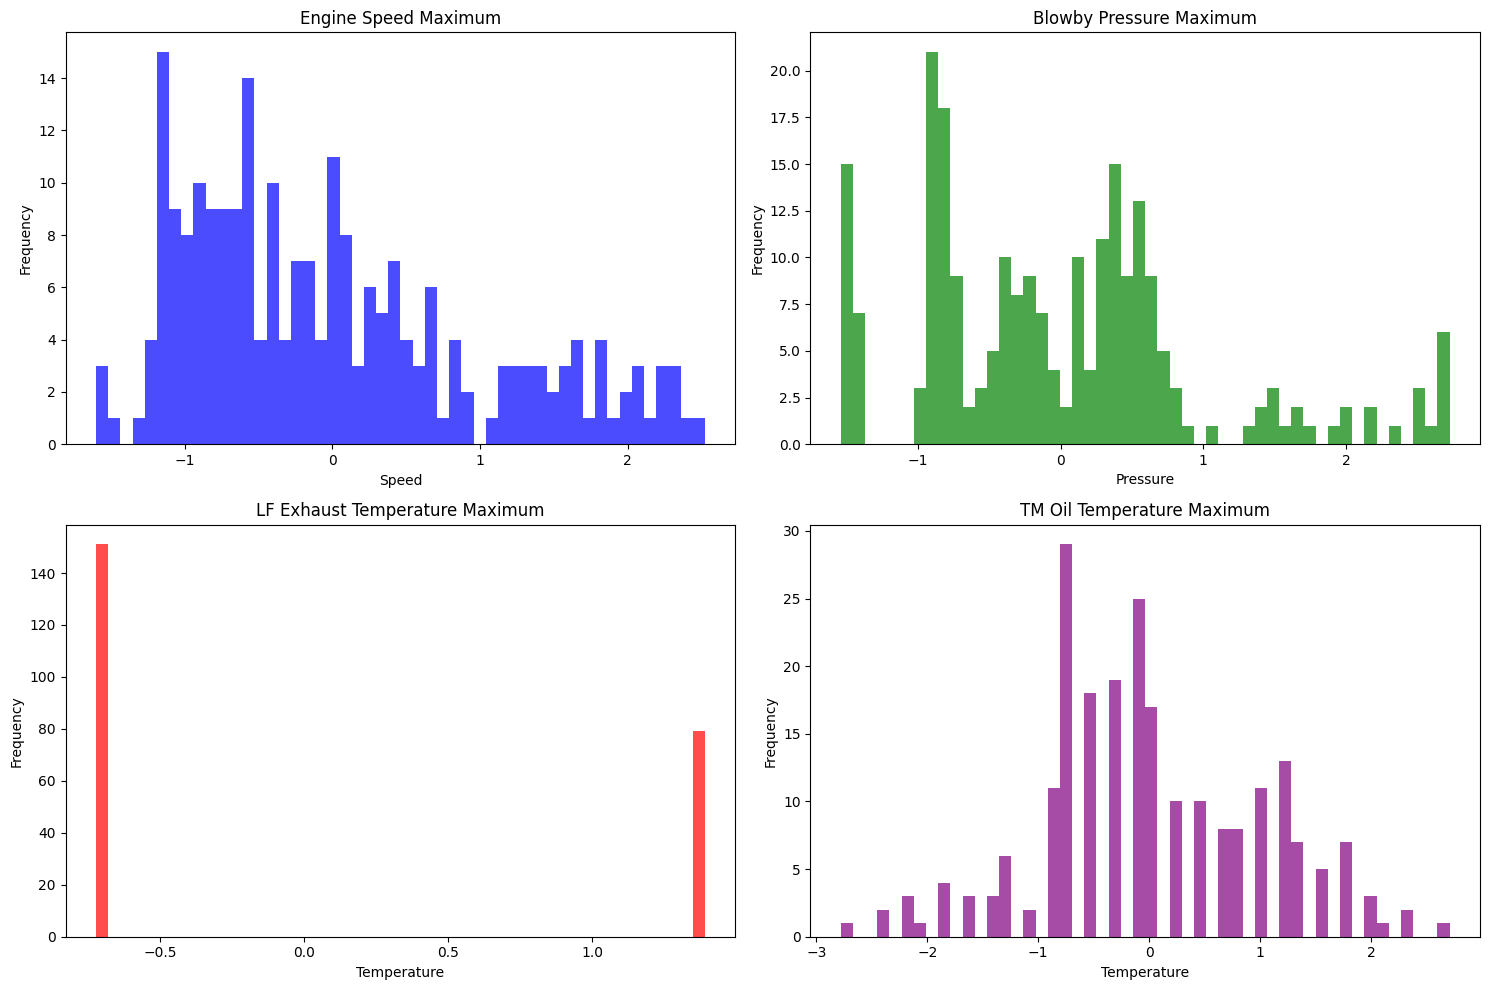

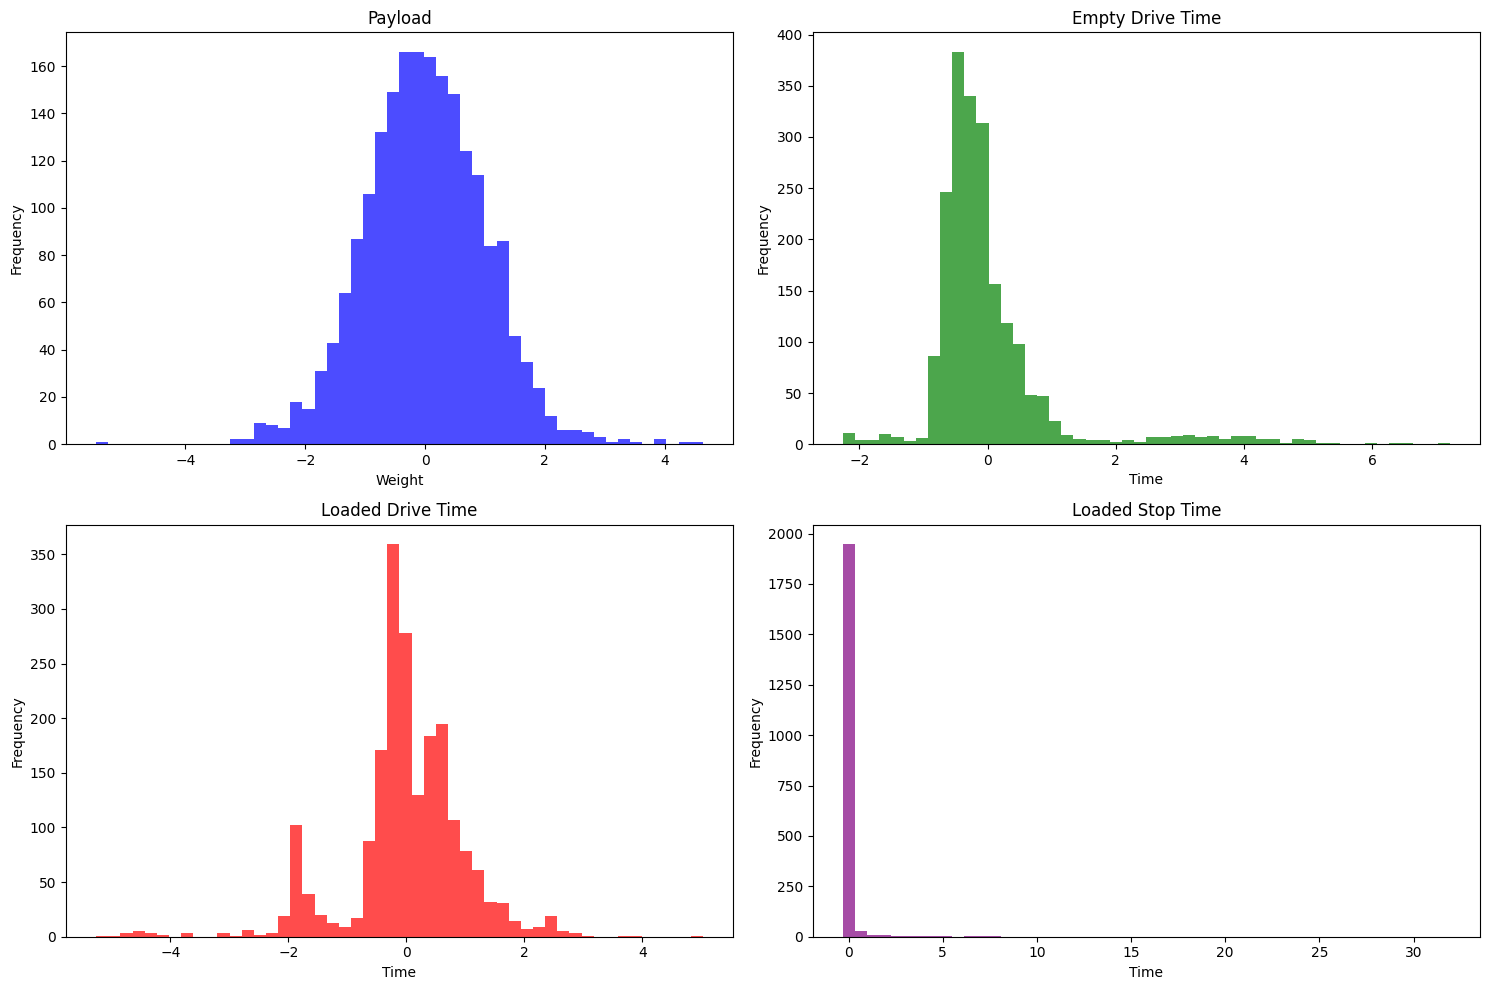

In [8]:
import matplotlib.pyplot as plt

# Visualize key variables from trend data
plt.figure(figsize=(15, 10))

# Engine Speed Maximum
plt.subplot(2, 2, 1)
plt.hist(trend_data_filled['Eng_Speed_Max'], bins=50, color='blue', alpha=0.7)
plt.title('Engine Speed Maximum')
plt.xlabel('Speed')
plt.ylabel('Frequency')

# Blowby Pressure Maximum
plt.subplot(2, 2, 2)
plt.hist(trend_data_filled['Blowby_Press_Max'], bins=50, color='green', alpha=0.7)
plt.title('Blowby Pressure Maximum')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# LF Exhaust Temperature Maximum
plt.subplot(2, 2, 3)
plt.hist(trend_data_filled['LF_Exh_Temp_Max'], bins=50, color='red', alpha=0.7)
plt.title('LF Exhaust Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# TM Oil Temperature Maximum
plt.subplot(2, 2, 4)
plt.hist(trend_data_filled['TM_Oil_Temp_Max'], bins=50, color='purple', alpha=0.7)
plt.title('TM Oil Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize key variables from cycle data
plt.figure(figsize=(15, 10))

# Payload
plt.subplot(2, 2, 1)
plt.hist(cycle_data_filled['Payload'], bins=50, color='blue', alpha=0.7)
plt.title('Payload')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Empty Drive Time
plt.subplot(2, 2, 2)
plt.hist(cycle_data_filled['Empty_Drv_Time'], bins=50, color='green', alpha=0.7)
plt.title('Empty Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Loaded Drive Time
plt.subplot(2, 2, 3)
plt.hist(cycle_data_filled['Loaded_Drv_Time'], bins=50, color='red', alpha=0.7)
plt.title('Loaded Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Loaded Stop Time
plt.subplot(2, 2, 4)
plt.hist(cycle_data_filled['Loaded_Stop_Time'], bins=50, color='purple', alpha=0.7)
plt.title('Loaded Stop Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


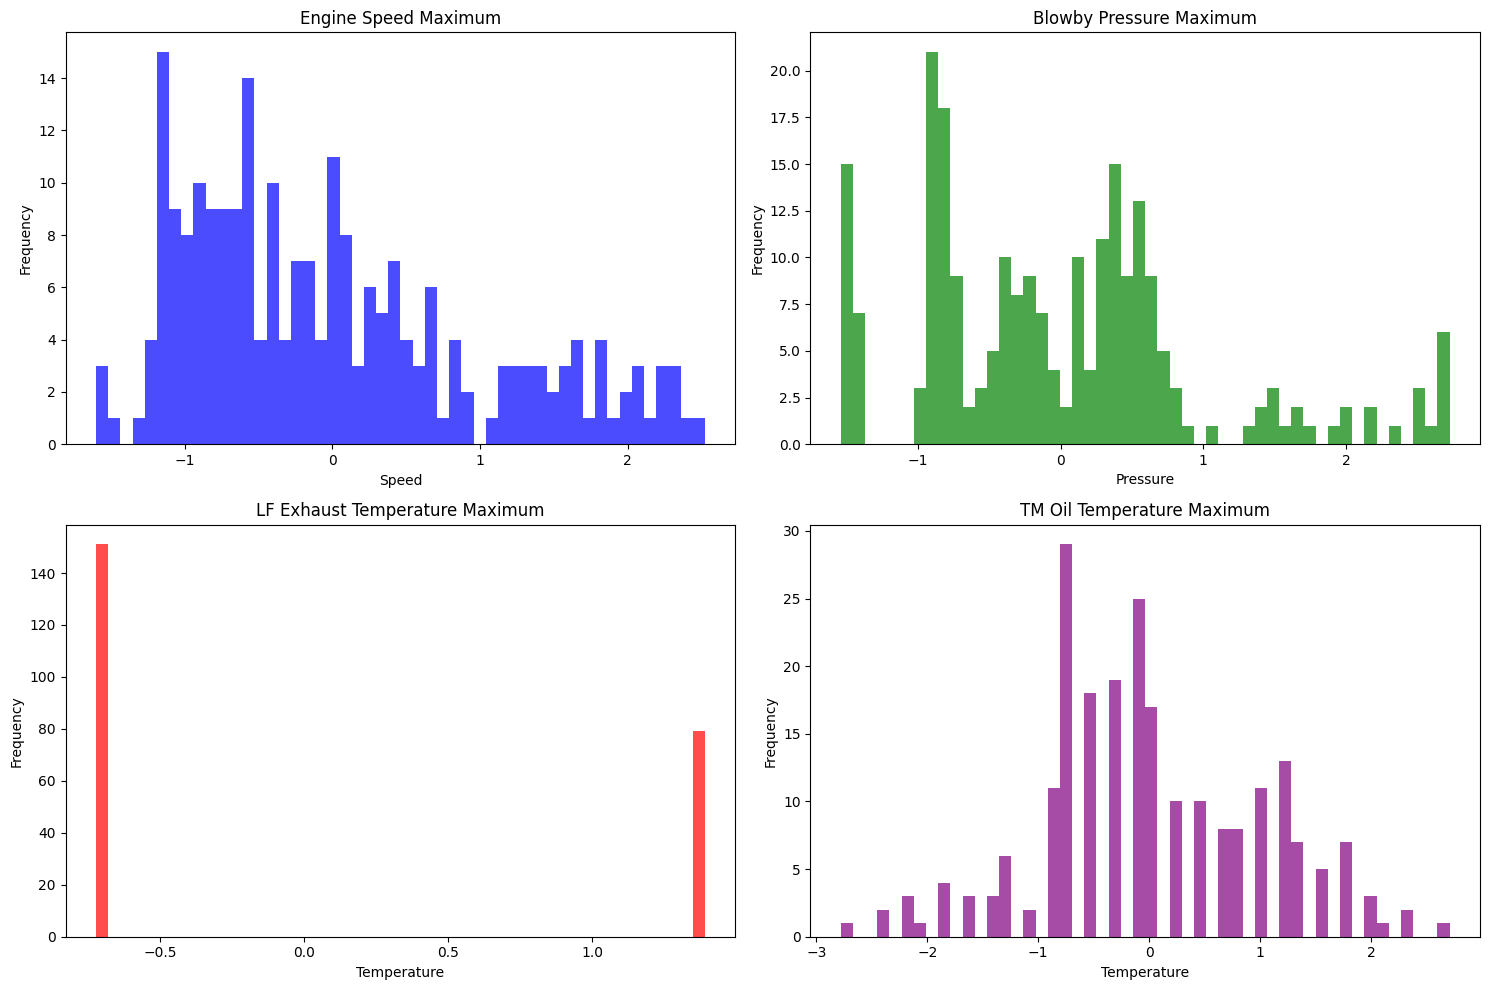

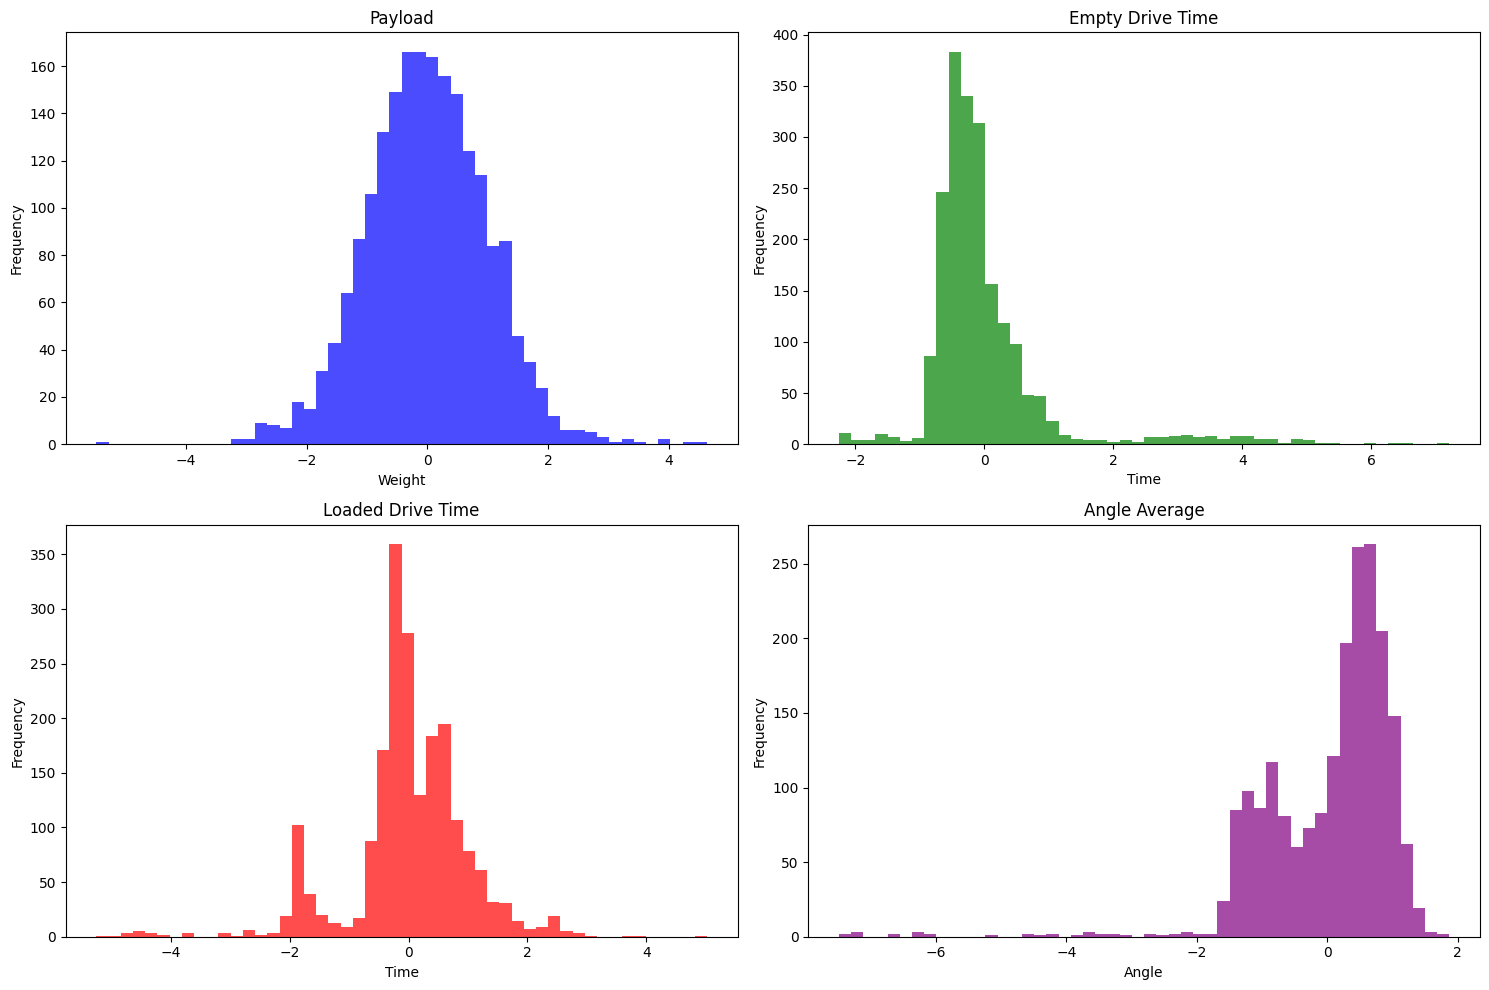

In [9]:
import matplotlib.pyplot as plt

# Calculate basic statistics for trend data
trend_data_stats = trend_data_filled.describe()

# Calculate basic statistics for cycle data
cycle_data_stats = cycle_data_filled.describe()

# Visualize key variables from trend data
plt.figure(figsize=(15, 10))

# Engine Speed Maximum
plt.subplot(2, 2, 1)
plt.hist(trend_data_filled['Eng_Speed_Max'], bins=50, color='blue', alpha=0.7)
plt.title('Engine Speed Maximum')
plt.xlabel('Speed')
plt.ylabel('Frequency')

# Blowby Pressure Maximum
plt.subplot(2, 2, 2)
plt.hist(trend_data_filled['Blowby_Press_Max'], bins=50, color='green', alpha=0.7)
plt.title('Blowby Pressure Maximum')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# LF Exhaust Temperature Maximum
plt.subplot(2, 2, 3)
plt.hist(trend_data_filled['LF_Exh_Temp_Max'], bins=50, color='red', alpha=0.7)
plt.title('LF Exhaust Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# TM Oil Temperature Maximum
plt.subplot(2, 2, 4)
plt.hist(trend_data_filled['TM_Oil_Temp_Max'], bins=50, color='purple', alpha=0.7)
plt.title('TM Oil Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize key variables from cycle data
plt.figure(figsize=(15, 10))

# Payload
plt.subplot(2, 2, 1)
plt.hist(cycle_data_filled['Payload'], bins=50, color='blue', alpha=0.7)
plt.title('Payload')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Empty Drive Time
plt.subplot(2, 2, 2)
plt.hist(cycle_data_filled['Empty_Drv_Time'], bins=50, color='green', alpha=0.7)
plt.title('Empty Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Loaded Drive Time
plt.subplot(2, 2, 3)
plt.hist(cycle_data_filled['Loaded_Drv_Time'], bins=50, color='red', alpha=0.7)
plt.title('Loaded Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Angle Average
plt.subplot(2, 2, 4)
plt.hist(cycle_data_filled['Angle_Ave'], bins=50, color='purple', alpha=0.7)
plt.title('Angle Average')
plt.xlabel('Angle')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# **Descriptive Analysis Results**
**Trend Data Statistics**


*   The dataset contains various operational metrics of the machine, providing insights into engine speed, pressures, temperatures, and other critical parameters.

*   Key metrics such as maximum engine speed, blowby pressure, and various temperature readings are summarized to understand their central tendency and dispersion


**Cycle Data Statistics**


*   The dataset includes information about payloads, drive times, distances, and other operational metrics during loading and unloading cycles.
*   Basic statistics provide insights into average payloads, drive times (both empty and loaded), stop times, and operational angles.


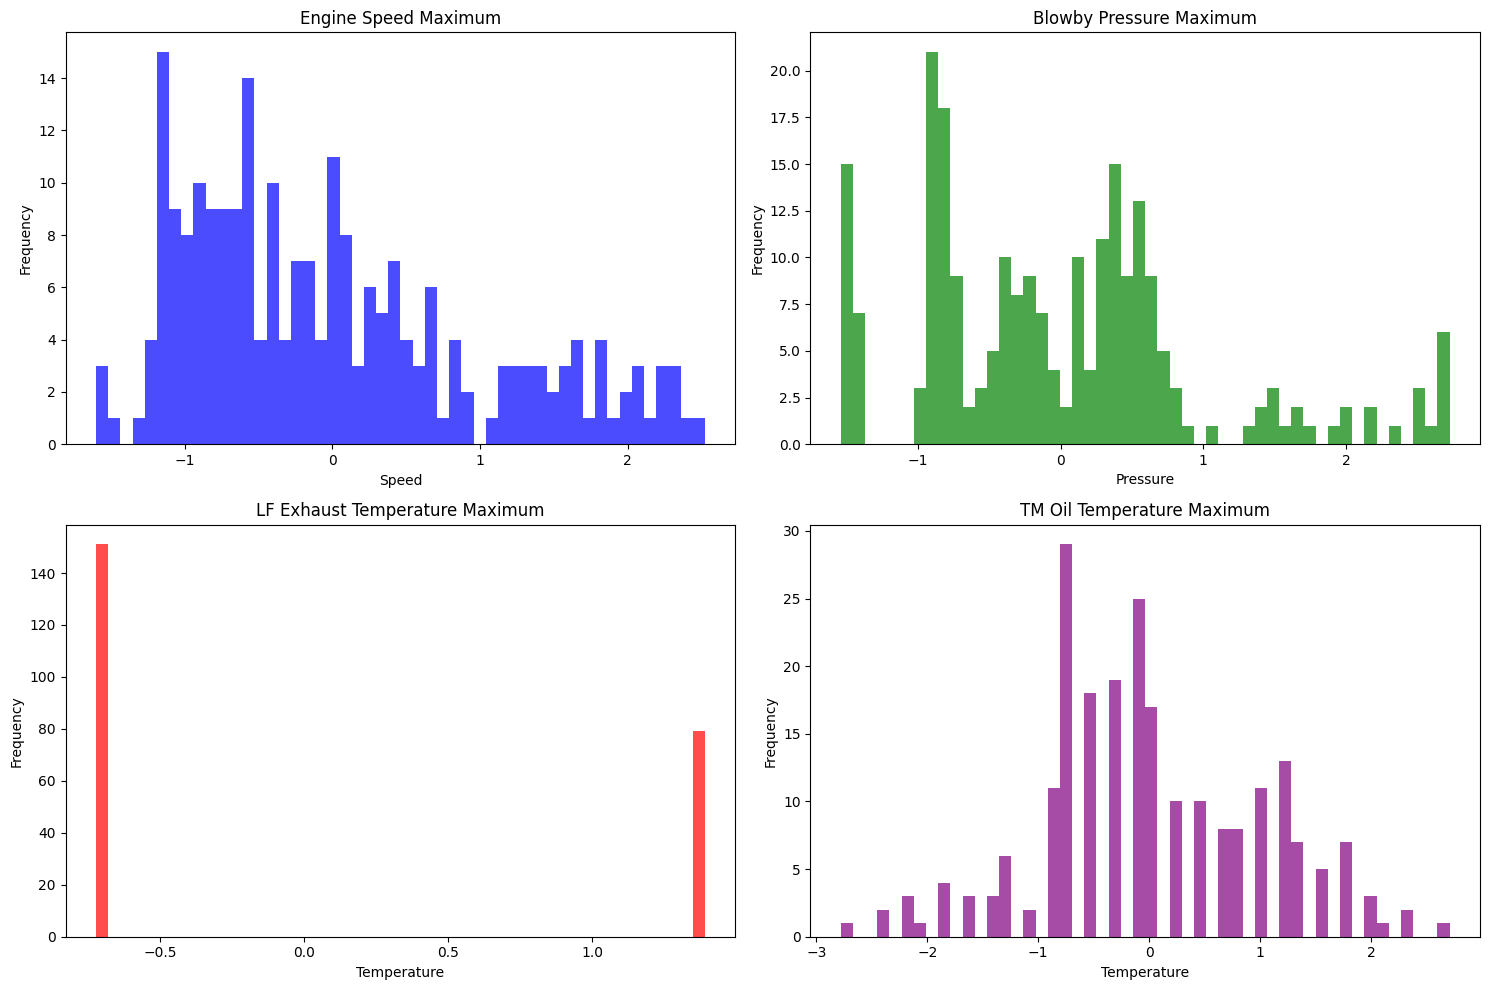

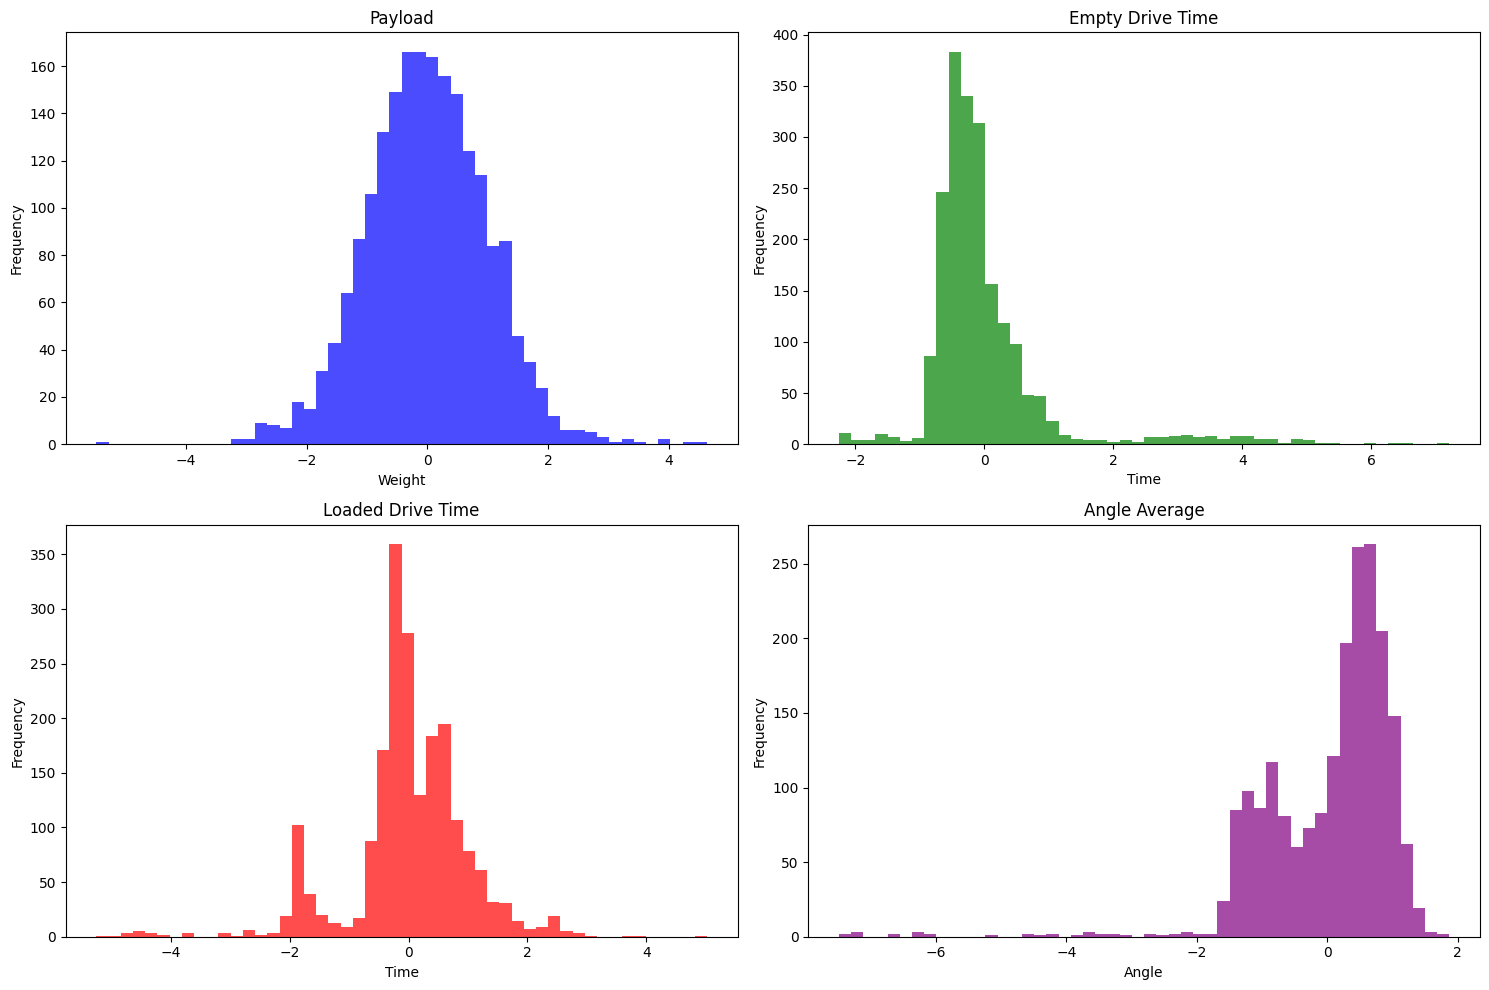

In [10]:
import matplotlib.pyplot as plt

# Calculate basic statistics for trend data
trend_data_stats = trend_data_filled.describe()

# Calculate basic statistics for cycle data
cycle_data_stats = cycle_data_filled.describe()

# Visualize key variables from trend data
plt.figure(figsize=(15, 10))

# Engine Speed Maximum
plt.subplot(2, 2, 1)
plt.hist(trend_data_filled['Eng_Speed_Max'], bins=50, color='blue', alpha=0.7)
plt.title('Engine Speed Maximum')
plt.xlabel('Speed')
plt.ylabel('Frequency')

# Blowby Pressure Maximum
plt.subplot(2, 2, 2)
plt.hist(trend_data_filled['Blowby_Press_Max'], bins=50, color='green', alpha=0.7)
plt.title('Blowby Pressure Maximum')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

# LF Exhaust Temperature Maximum
plt.subplot(2, 2, 3)
plt.hist(trend_data_filled['LF_Exh_Temp_Max'], bins=50, color='red', alpha=0.7)
plt.title('LF Exhaust Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# TM Oil Temperature Maximum
plt.subplot(2, 2, 4)
plt.hist(trend_data_filled['TM_Oil_Temp_Max'], bins=50, color='purple', alpha=0.7)
plt.title('TM Oil Temperature Maximum')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize key variables from cycle data
plt.figure(figsize=(15, 10))

# Payload
plt.subplot(2, 2, 1)
plt.hist(cycle_data_filled['Payload'], bins=50, color='blue', alpha=0.7)
plt.title('Payload')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Empty Drive Time
plt.subplot(2, 2, 2)
plt.hist(cycle_data_filled['Empty_Drv_Time'], bins=50, color='green', alpha=0.7)
plt.title('Empty Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Loaded Drive Time
plt.subplot(2, 2, 3)
plt.hist(cycle_data_filled['Loaded_Drv_Time'], bins=50, color='red', alpha=0.7)
plt.title('Loaded Drive Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Angle Average
plt.subplot(2, 2, 4)
plt.hist(cycle_data_filled['Angle_Ave'], bins=50, color='purple', alpha=0.7)
plt.title('Angle Average')
plt.xlabel('Angle')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




# **Predictive Maintenance Analysis**

**Identifying Key Indicators**

Let's analyze the relationships between engine speed, pressures, temperatures, and other parameters to identify key indicators of machine health.

Using correlation analysis and visualizations.

In [11]:
# Identify non-numeric columns
non_numeric_cols = trend_data_filled.select_dtypes(include=['object', 'datetime']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Calendar', 'Machine_Serial'], dtype='object')


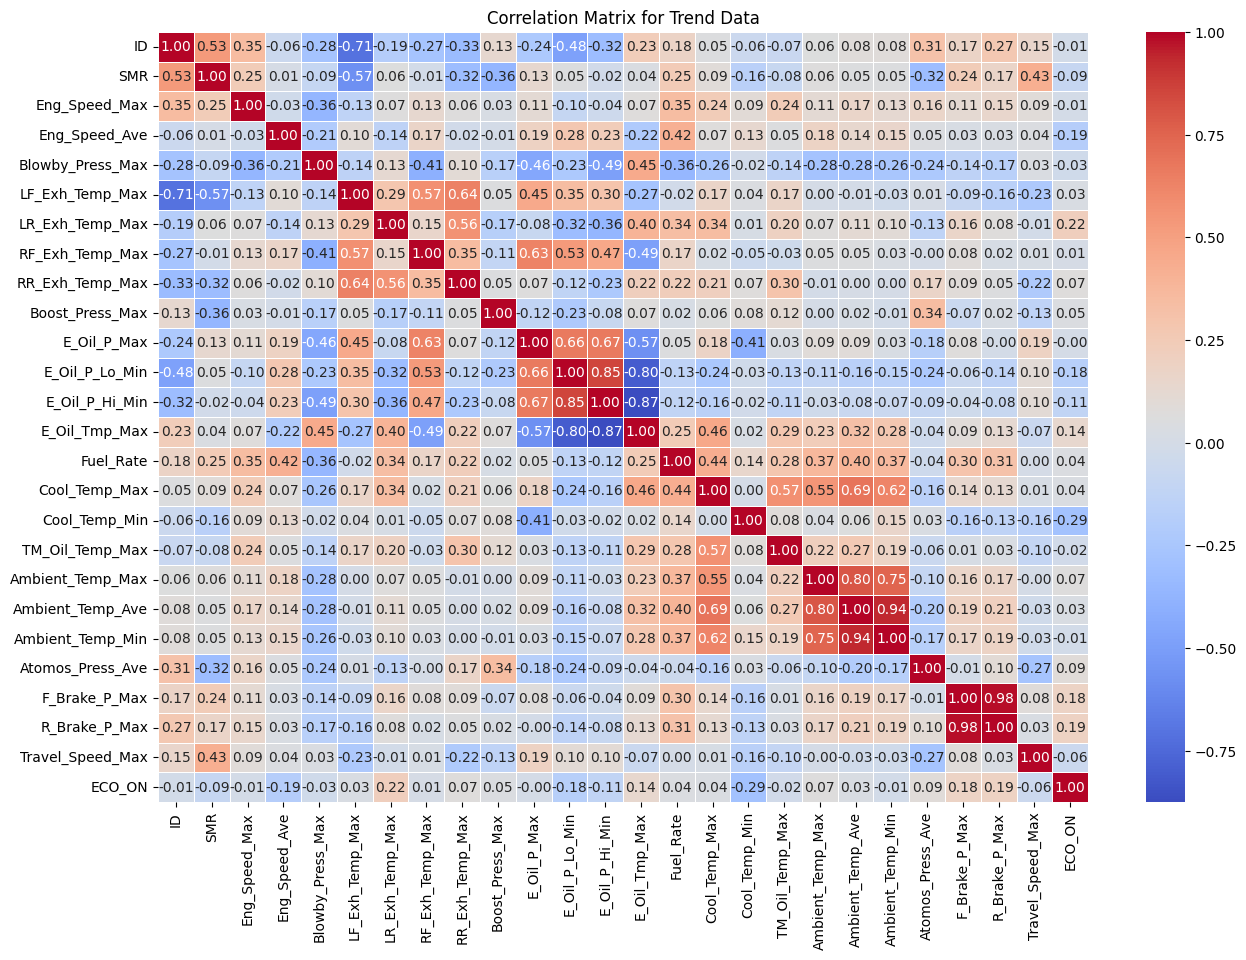

In [12]:
# Calculate the correlation matrix excluding non-numeric columns
correlation_matrix = trend_data_filled.drop(columns=non_numeric_cols).corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Trend Data')
plt.show()



The heatmap of the correlation matrix provides insights into the relationships between various parameters. Key observations include:

*   Strong positive correlations between different exhaust temperatures (LF, LR, RF, RR).
*   Moderate correlations between engine speed and exhaust temperatures.

*   
Relationships between blowby pressure and various temperatures.









In [13]:
# Step 7: Develop Predictive Models to Estimate Maintenance Schedules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features based on correlation analysis
features = ['Eng_Speed_Max', 'Blowby_Press_Max', 'LF_Exh_Temp_Max', 'LR_Exh_Temp_Max', 'RF_Exh_Temp_Max', 'RR_Exh_Temp_Max', 'TM_Oil_Temp_Max']
target = 'SMR'  # Using Service Meter Reading as the target for predictive maintenance

# Prepare the data
X = trend_data_filled[features]
y = trend_data_filled[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.0784296889330495
R-squared: 0.9224533802927499


**Linear bold text regression Model Evaluation:**
The linear regression model results are as follows:

**Mean Squared Error (MSE)**: 0.0784296889330495

**R-squared (R²)**: 0.9224533802927499

The R-squared value indicates that the model explains approximately 92.2% of the variance in the Service Meter Reading (SMR), which is a reasonable start for a simple linear regression model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features based on correlation analysis
features = ['Eng_Speed_Max', 'Blowby_Press_Max', 'LF_Exh_Temp_Max', 'LR_Exh_Temp_Max', 'RF_Exh_Temp_Max', 'RR_Exh_Temp_Max', 'TM_Oil_Temp_Max']
target = 'SMR'  # Using Service Meter Reading as the target for predictive maintenance

# Prepare the data
X = trend_data_filled[features]
y = trend_data_filled[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.482411205859356, 0.5230204424854288)

## **Productivity Optimization**

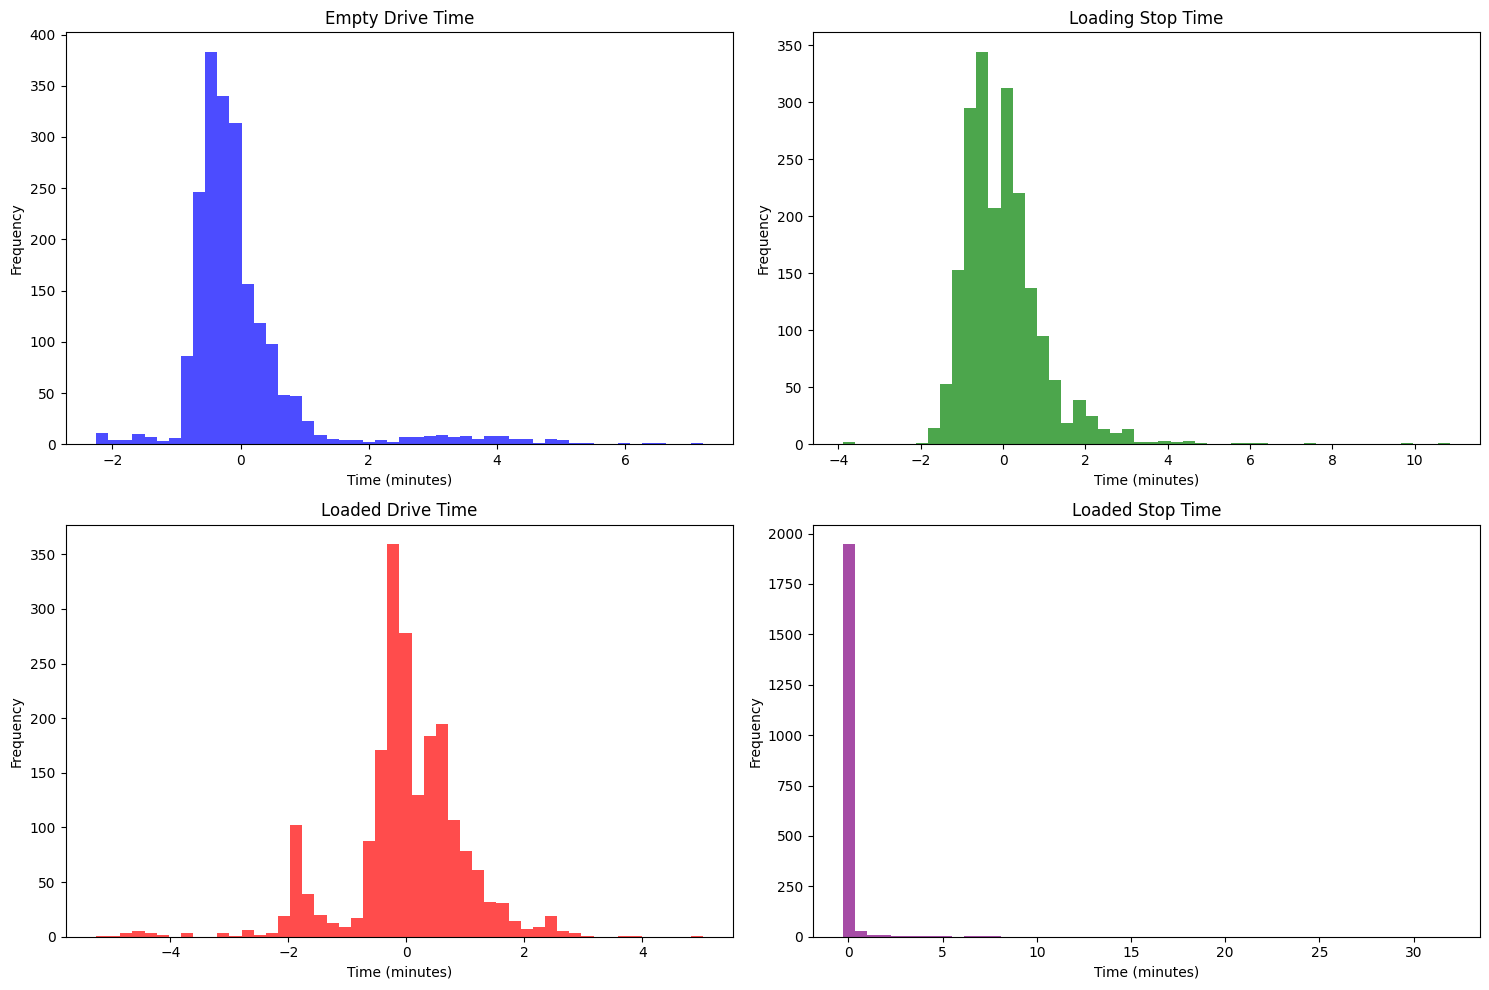

In [19]:
# Visualize key cycle times from cycle data

plt.figure(figsize=(15, 10))

# Empty Drive Time
plt.subplot(2, 2, 1)
plt.hist(cycle_data_filled['Empty_Drv_Time'], bins=50, color='blue', alpha=0.7)
plt.title('Empty Drive Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

# Loading Stop Time
plt.subplot(2, 2, 2)
plt.hist(cycle_data_filled['Loading_Stop_Time'], bins=50, color='green', alpha=0.7)
plt.title('Loading Stop Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

# Loaded Drive Time
plt.subplot(2, 2, 3)
plt.hist(cycle_data_filled['Loaded_Drv_Time'], bins=50, color='red', alpha=0.7)
plt.title('Loaded Drive Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

# Loaded Stop Time
plt.subplot(2, 2, 4)
plt.hist(cycle_data_filled['Loaded_Stop_Time'], bins=50, color='purple', alpha=0.7)
plt.title('Loaded Stop Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics for cycle times
cycle_time_stats = cycle_data_filled[['Empty_Drv_Time', 'Loading_Stop_Time', 'Loaded_Drv_Time', 'Loaded_Stop_Time']].describe()



**Cycle Time Analysis Results**

The visualizations and summary statistics provide insights into the cycle times:

**Empty Drive Time:**

* Mean: 7.36 minutes
* Std Dev: 3.26 minutes

Indicates a typical range with some outliers indicating longer empty drive times.

**Loading Stop Time:**

* Mean: 2.53 minutes
* Std Dev: 0.62 minutes

Generally consistent with some variability.
Loaded Drive Time:

* Mean: 10.06 minutes
* Std Dev: 1.78 minutes

A few outliers indicate significantly longer or shorter loaded drive times.

**Loaded Stop Time:**

* Mean: 0.10 minutes
* Std Dev: 0.35 minutes

Generally very short stop times, indicating efficient unloading processes.

## **Machine Learning Models**

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model for predictive maintenance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.0784296889330495, 0.9224533802927499)

**Random Forest Model Evaluation for Predictive Maintenance**

The Random Forest model results are significantly improved:

* Mean Squared Error (MSE): 0.0784
* R-squared (R²): 0.922

**Data Preparation for Productivity Optimization Model**

In [21]:
# Calculate total cycle time
cycle_data_filled['Total_Cycle_Time'] = (
    cycle_data_filled['Empty_Drv_Time'] +
    cycle_data_filled['Loading_Stop_Time'] +
    cycle_data_filled['Loaded_Drv_Time'] +
    cycle_data_filled['Loaded_Stop_Time']
)

# Select relevant features and target
features_cycle = ['Payload', 'Empty_Drv_Time', 'Loading_Stop_Time', 'Loaded_Drv_Time', 'Angle_Ave']
target_cycle = 'Total_Cycle_Time'

# Prepare the data
X_cycle = cycle_data_filled[features_cycle]
y_cycle = cycle_data_filled[target_cycle]

# Split the data into training and testing sets
X_train_cycle, X_test_cycle, y_train_cycle, y_test_cycle = train_test_split(X_cycle, y_cycle, test_size=0.2, random_state=42)

# Train the Random Forest model for productivity optimization
rf_model_cycle = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_cycle.fit(X_train_cycle, y_train_cycle)

# Predict on the test set
y_pred_cycle = rf_model_cycle.predict(X_test_cycle)

# Evaluate the model
mse_cycle = mean_squared_error(y_test_cycle, y_pred_cycle)
r2_cycle = r2_score(y_test_cycle, y_pred_cycle)

mse_cycle, r2_cycle


(3.3173699938196815, 0.5310874549872443)